Abel Stanley

13517068

# Week 13 Handson - Clustering
In this hands-on, we will empoy clustering technique to cluster data.

## Read the Dataset

Execute the following code to read the digit mnist dataset. The folder of `digit_mnist` dataset must be in the same directory with this ipynb file.

The dataset contains 500 digit handwritten images from 5 different classes/labels (0, 1, 2, 3, 4). The first 100 images have label of 0, the second 100 images have label of 1, and so on, until the fifth 100 images have label of 4.

In [66]:
# membaca library yang dibutuhkan
import numpy as np #library untuk komputasi matriks
import cv2 #library untuk memproses gambar/video
import matplotlib.pyplot as plt #library untuk plot data (visualisasi)
import os
import pandas as pd

# fungsi untuk membaca gambar (digit MNIST) ke matriks numpy per folder
def baca_image(folder_image):
    count = 0;
    list_nama_image= os.listdir(folder_image)
    list_path_image = [os.path.join(folder_image, i) for i in list_nama_image]
    all_image = np.ndarray(shape=(0,28*28))
    for i in list_path_image:
        image = cv2.imread(i, 0) #baca image menggunakan OpenCV API dalam gray image (0=gray, 1=berwarna).
        image_reshaped = image.reshape((1, -1))
        all_image = np.concatenate((all_image, image_reshaped), axis=0)
        count = count + 1
        if count >= 100:
            break
    return all_image
        
# menggunakan fungsi yg telah dibuat untuk membaca image MNIST '0' sampai '4' 
for angka in range(5):
    file = "digit_mnist/" + str(angka)
    digit = baca_image(file)
    if angka == 0:
        X = digit
    else :
        X = np.concatenate((X, digit), axis=0)

print("shape:", X.shape)

shape: (500, 784)


## Milestone 01 (M01)
In this milestone, you are asked to empoy clustering method to cluster the digit MNIST read above, into 5 clusters. The output of this milestone is clustered data. You may use any clustering method from any library you want.

In [67]:
#your answer for M01
# LIBS:
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Preprocessing:

In [68]:
# Preprocessing:
# convert each image to 1 dimensional array

X_ = X.reshape(len(X),-1)
y_ = []
for i in range(5):
    y_ += [i for _ in range(100)]
y_ = np.array(y_)

# normalize the data to 0 - 1

X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)
print(y_.shape)

(500, 784)
(784,)
(500,)


Clustering with sklearn's MiniBatchKMeans

In [69]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_))
print(n_digits)

# Initialize KMeans model

kmeans = MiniBatchKMeans(n_clusters = n_digits)

# Fit the model to the training data

kmeans.fit(X_)
display(kmeans.labels_)

5


array([2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 0, 1, 0, 3, 0, 0, 4, 0, 0, 3, 0, 4, 4, 0, 4, 0, 4, 0, 0, 4,
       0, 0, 4, 4, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 4, 0, 3, 4, 0, 1, 0,
       0, 4, 0, 4, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 3, 4, 4, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 1, 1, 4, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [70]:
# import matplotlib
# fig = plt.figure(figsize=(8,8))
# colors = ['orange','blue','purple','green', 'red']
# colored = [colors[k] for k in kmeans.labels_]
# print (colored[0:10])
# plt.scatter(X_[4],X_[1],  color = colored)
# for ci,c in enumerate(kmeans.cluster_centers_):
#     plt.plot(c[0], c[1], 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

# plt.xlabel('x_values')
# plt.ylabel('y_values')
# plt.legend()
# plt.show()

## M02
Evaluate the clustering results in M01, as follows.
1. For each cluster, take the dominant class. E.g., in cluster 1, 96% data are digit 3 images, thus, all images in the cluster 1 have class prediction of 3 (digit 3). Likewise for other clusters.
2. With that prediction ouput, evaluate the clustering result using metrics of: (i) accuracy, (ii) precision: $TP/pred. yes$ and recall$: TP/actual yes$ for each class.
3. Print the metrics you get in (2).

In [71]:
#your answer for M02
import math
n_sets = 100

pred_cluster = [[0 for j in range(n_digits)] for i in range(n_digits)]
for idx,label in enumerate(kmeans.labels_):
    pred_cluster[label][math.floor(idx/n_sets)] += 1

print(pred_cluster)
for idx,cluster in enumerate(pred_cluster):
    pred_cluster[idx] = pred_cluster[idx].index(max(pred_cluster[idx]))
    
print(pred_cluster) # contains 
    
math.ceil(101/100)

[[7, 2, 67, 13, 0], [1, 1, 8, 3, 95], [88, 0, 0, 0, 0], [4, 0, 6, 75, 0], [0, 97, 19, 9, 5]]
[2, 4, 0, 3, 1]


2

I've implemented my own accuracy, recall, and precision calculation. I will be comparing the result to sklearn's classification report to verify it is working as intended.

In [101]:
def make_predictions(pred_cluster,labels):
    pred = []
    for i in range(len(labels)):
        pred.append(pred_cluster[labels[i]])
    return pred

def accuracy(pred, truth):
    count = 0
    for i in range(len(pred)):
        if(pred[i] == truth[i]):
            count += 1
    return count/len(pred)

from collections import defaultdict
def calculate_conf_mat(pred, truth, target):
    conf_mat = defaultdict(lambda:0,{})
    for i in range(len(pred)):
        if(pred[i] == target and truth[i] == target):
            conf_mat['tp'] += 1
        elif (pred[i] == target and truth[i] != target):
            conf_mat['fp'] += 1
        elif(pred[i] != target and truth[i] != target):
            conf_mat['tn'] += 1
        elif(pred[i] != target and truth[i] == target):
            conf_mat['fn'] += 1
    return conf_mat
    
def precision(conf_mat):
    return conf_mat['tp'] / (conf_mat['tp'] + conf_mat['fp'])

def recall(conf_mat):
    return conf_mat['tp'] / (conf_mat['tp'] + conf_mat['fn']) #focus on actual positives

print('Shapes:')
final_preds = make_predictions(pred_cluster, kmeans.labels_)
print(np.array(final_preds).shape, y_.shape, kmeans.labels_.shape)
print('----------------------------------------------------------')
print('Accuracy',accuracy(final_preds, y_))
score = accuracy_score(y_,final_preds)
print('sklearn metric accuracy score:', score)
print('----------------------------------------------------------')

for i in range(n_digits):
    conf_mat = calculate_conf_mat(final_preds, y_, i)
    print('==================================================')
    print('evaluation for', i, 'digit')
    print(conf_mat)
    print('precision:', precision(conf_mat))
    print('recall:', recall(conf_mat))
    print('==================================================')

Shapes:
(500,) (500,) (18484,)
----------------------------------------------------------
Accuracy 0.844
sklearn metric accuracy score: 0.844
----------------------------------------------------------
evaluation for 0 digit
defaultdict(<function calculate_conf_mat.<locals>.<lambda> at 0x0000023C38B010D0>, {'tp': 88, 'fn': 12, 'tn': 400})
precision: 1.0
recall: 0.88
evaluation for 1 digit
defaultdict(<function calculate_conf_mat.<locals>.<lambda> at 0x0000023C38B01F28>, {'tn': 367, 'tp': 97, 'fn': 3, 'fp': 33})
precision: 0.7461538461538462
recall: 0.97
evaluation for 2 digit
defaultdict(<function calculate_conf_mat.<locals>.<lambda> at 0x0000023C389EE400>, {'tn': 378, 'fp': 22, 'tp': 67, 'fn': 33})
precision: 0.7528089887640449
recall: 0.67
evaluation for 3 digit
defaultdict(<function calculate_conf_mat.<locals>.<lambda> at 0x0000023C38AD31E0>, {'tn': 390, 'fp': 10, 'fn': 25, 'tp': 75})
precision: 0.8823529411764706
recall: 0.75
evaluation for 4 digit
defaultdict(<function calculate_co

with sklearn's classification report

In [93]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_, final_preds)

In [97]:
FP = conf_mat.sum(axis=0) - np.diag(conf_mat)  
FN = conf_mat.sum(axis=1) - np.diag(conf_mat)
TP = np.diag(conf_mat)
TN = conf_mat.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print(TP,TN, FP, FN)
print(TPR)

[88 97 67 75 95] [400 367 378 390 387] [ 0 33 22 10 13] [12  3 33 25  5]
[0.88 0.97 0.67 0.75 0.95]


In [98]:
print(classification_report(y_, final_preds))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       100
           1       0.75      0.97      0.84       100
           2       0.75      0.67      0.71       100
           3       0.88      0.75      0.81       100
           4       0.88      0.95      0.91       100

    accuracy                           0.84       500
   macro avg       0.85      0.84      0.84       500
weighted avg       0.85      0.84      0.84       500



## M03

Suppose you are working for goverment that they want to lauch development program to society. The program is expected to empower the society to improve their welfare. Given sample dataset of `people.csv` (provided in the zip), you are asked to segment the data. The data attibutes are: name, age, marital status, income range, gender, total children, children at home, education, occupation, home owner, cars. You may define your own variables, such as the number of segments, attributes that are used, etc. Please provide your arguments of choosing those variables, and show (or visualize) the segments you create, including at least brief explanation.

In [74]:
#your answer for M03
df = pd.read_csv('people.csv', engine='python')

### EDA

In [75]:
df.head()

,Name,Age,MaritalStatus,IncomeRange,Gender,TotalChildren,ChildrenAtHome,Education,Occupation,HomeOwner,Cars
0,Aaron Adams,42,0,50000,0,0,0,3,2,1,1
1,Aaron Alexander,40,1,50000,0,0,0,2,2,1,2
2,Aaron Allen,63,0,25000,0,2,1,2,1,1,2
3,Aaron Baker,56,1,50000,0,4,2,2,2,1,2
4,Aaron Bryant,72,0,75000,0,4,0,4,4,1,2


In [76]:
df.shape

(18508, 11)

#### Check Age distribution

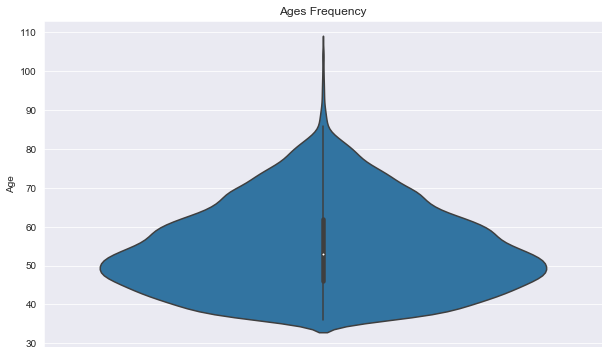

In [77]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

'people.csv' seems to consist of old people... interesting.

#### Check age group distribution

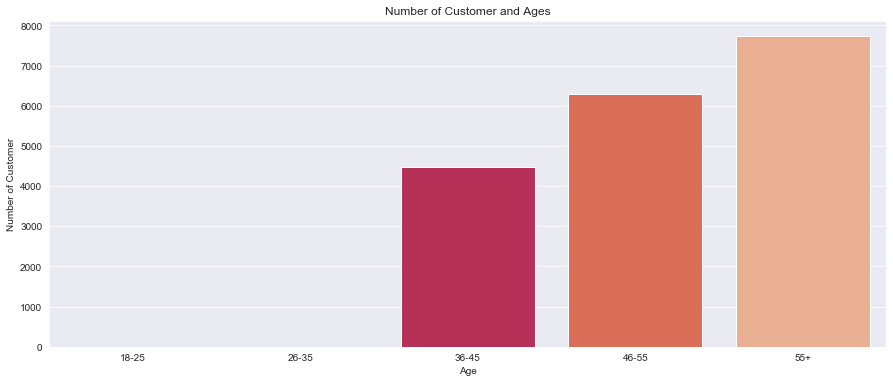

In [78]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

Most people in people.csv is 55+ years old or older!

#### Explore the distribution of IncomeRange

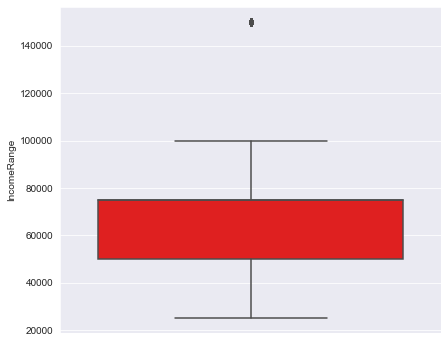

In [79]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["IncomeRange"], color="red")
plt.show()

The standard deviation of Income Range is quite high. The gap between Minimum (Q1 - 1.5*IQR) and Maximum (Q3 + 1.5 * IQR) is quite large (80k).

There are also some outliers there with 140k ++ income.

Most people then to sit aroung 62.5k income range.

#### Explore the distribution of Gender

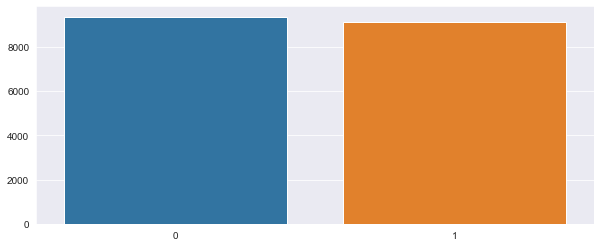

In [80]:
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

Assumption: 0 is Male and 1 is Female. Thus the dataset has slightly more entries on male than females. The difference is minor though. We can assume that the dataset is balanced on this feature.

#### Explore the distribution of Total Children

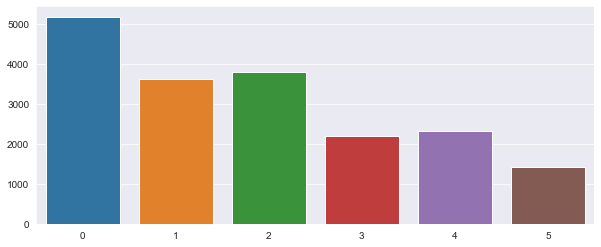

In [81]:
totalchildren = df.TotalChildren.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=totalchildren.index, y=totalchildren.values)
plt.show()

There are more people with children than the people without. People who decide to have children tend to have only 2 children.

#### Explore the distribution of Children at Home

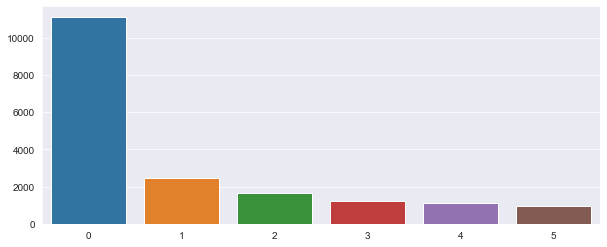

In [82]:
childrenAtHome = df.ChildrenAtHome.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=childrenAtHome.index, y=childrenAtHome.values)
plt.show()

Turns out that most of the children are not at home anymore. Maybe it's because they have turned adult already since we have established that people.csv mostly consisted of the elderly.

#### Explore the distribution of Education

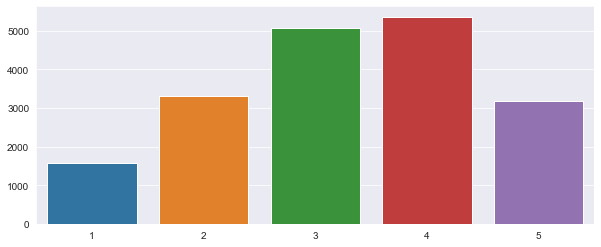

In [83]:
education = df.Education.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=education.index, y=education.values)
plt.show()

Assuming that this column is ordinal, higher value means higher education level. Based on the distribution above, the people here seems to be well educated (in 3-4 range).

#### Explore the distribution of HomeOwner

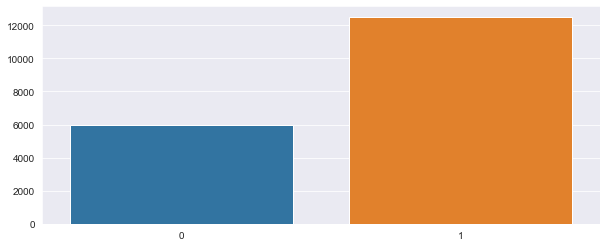

In [84]:
homeOwner = df.HomeOwner.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=homeOwner.index, y=homeOwner.values)
plt.show()

Wealthy people indeed. People who have homes doubled in number compared to people who don't.

#### Explore the distribution of Cars

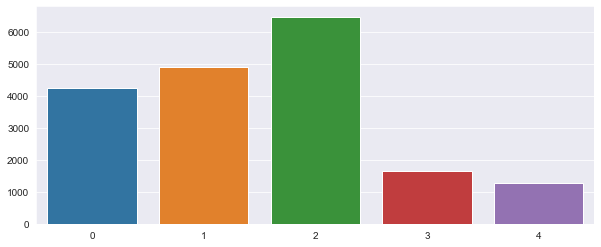

In [85]:
cars = df.Cars.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=cars.index, y=cars.values)
plt.show()

There are far more people with at least one car than people without one. Very prosperous lives I must say.

### Preprocessing!

In [86]:
print('Duplicate Entries: {}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)
print('Duplicate Entries After dropping: {}'.format(df.duplicated().sum()))

Duplicate Entries: 24
Duplicate Entries After dropping: 0


In [87]:
print('Duplicate Entries After dropping: {}'.format(df.duplicated().sum()))

Duplicate Entries After dropping: 0


### Segmentation!

##### WCSS
Use WCSS (Within Cluster Sum Of Squares) plotted against number of clusters (K val) to find out the most optimal number of clusters to be used.

The formula is given below:

WCSS measures sum of distances of observations from their cluster centroids.
WCSS = Sigma(Xi - Yi)^2

Yi is centroid for Xi observation. The objective is to maximize the number of clusters and limit cases where each data point becomes its own cluster centroid.

#### The Elbow Method
Calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS first starts to diminish. In the plot of WSS-versus k, this is visible as an elbow.

Steps:

1. Compute K-Means clustering for different values of K by varying K from 1 to 10 clusters.

2. For each K, calculate the total within-cluster sum of square (WCSS).

3. Plot the curve of WCSS vs the number of clusters K.

4. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

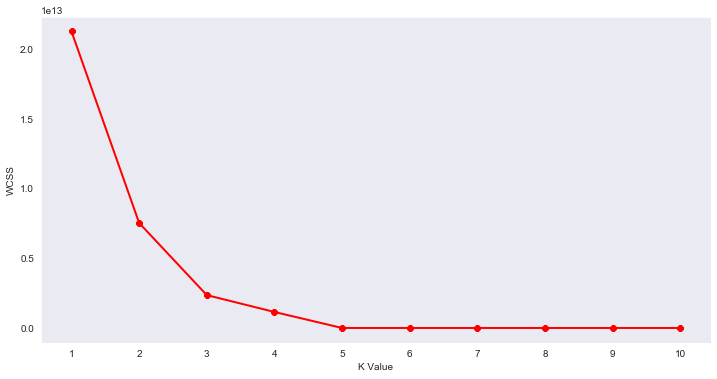

In [88]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:]) # name column is irrelevant
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

Judging from the graph above as the result of the **elbow method**, the optimal cluster num is **5**!

Because we want to improve welfare, we might want to look into government programmes which focus on **how we can enforce socio-economic equity in the society**.

Based on EDA carried out above we can conclude that:
1. Most people are elderly
2. There are lots of wealthy and prospering people proven by:
    - The number of people with cars far outweighs people without
    - The average educational level is 3 to 4
    - The number of people who own a house far outweighs people without
    - There are some people who have relatively very high income around 140k++ (outliers)
3. Also we discovered that there are a very glaring gap in socio-economic standings (and also some interesting points?):
    - The standard deviation, gap between min and max income range is very high (around 80k)
    - There are some people with level 1 education
    - There also around 6k people without home even though the data mostly consisted of old people
    - There are relatively high number of people (around 5k) without child even though the data mostly consisted of old people (I understand that not everybody wants to have a child, but this is an interesting point nonetheless).
    
4. Therefore, we would want to make segments that differentiate between those already wealthy and propsering to those who are stil struggling (relative to them), especially in old age.

Because visualization is best done in 3D (still visually understandable), I propose using these 3 variables to find out the people who needs governmental help the most:

1. **Age**

People at old age might not be able to support their family and themselves as well compared to those still in their prime. Elders are also more likely to suffer from health complication which supports my argument further.

2. **IncomeRange**

We aim to help people within lower income range to stablize against those within higher income range.

3. **ChildrenAtHome**

People with more children at home means that they have more heads to feed, thus requiring more funds to get by. This in turn helps us to locate which families in dire need of welfare support.

We will cluster the data into **5 clusters**, following the result gotten from the elbow method above.

3D plot to visualize:

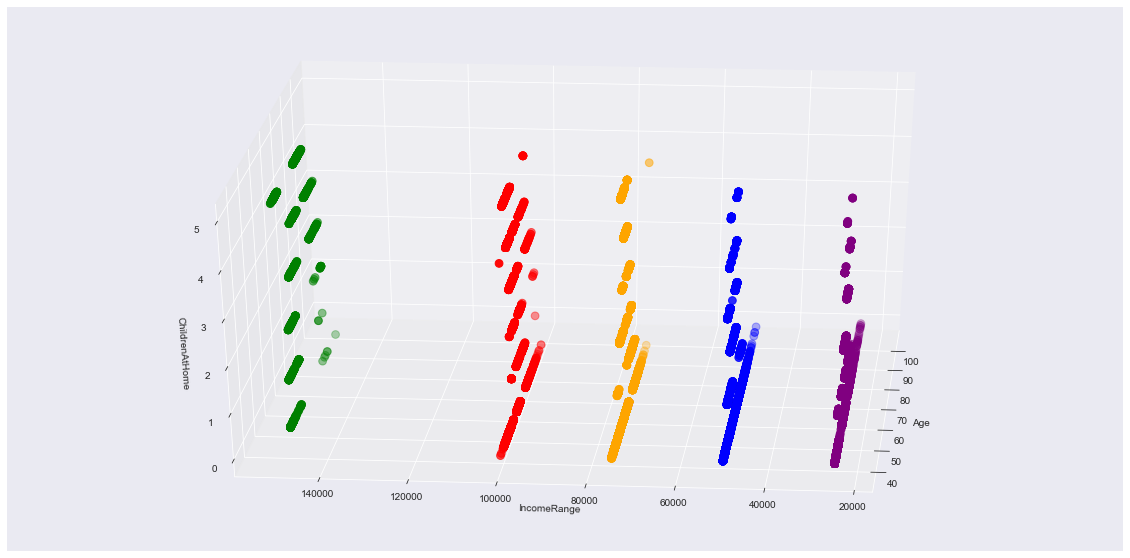

In [89]:


km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["IncomeRange"][df.label == 0], df["ChildrenAtHome"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["IncomeRange"][df.label == 1], df["ChildrenAtHome"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["IncomeRange"][df.label == 2], df["ChildrenAtHome"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["IncomeRange"][df.label == 3], df["ChildrenAtHome"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["IncomeRange"][df.label == 4], df["ChildrenAtHome"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("IncomeRange")
ax.set_zlabel('ChildrenAtHome')
plt.show()

So, the target of our segmentation resides in the color green; people who have low income, high number of children, and in old age.